In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

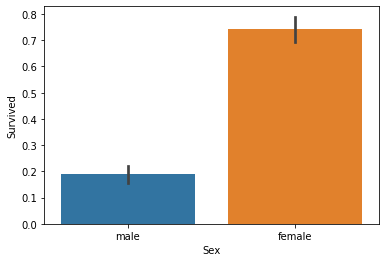

In [5]:
import seaborn as sns
%matplotlib inline
sns.barplot(x = "Sex", y = "Survived", data = df)

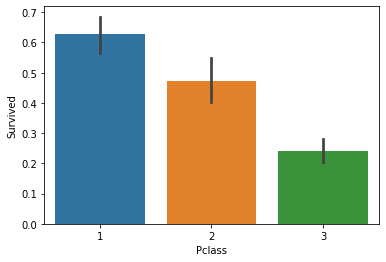

In [6]:
sns.barplot(x = "Pclass", y = "Survived", data = df)

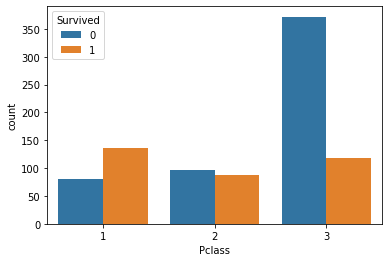

In [7]:
sns.countplot(x = "Pclass", hue = "Survived", data = df)

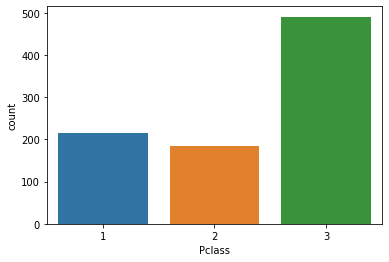

In [8]:
sns.countplot(x = "Pclass", data = df)

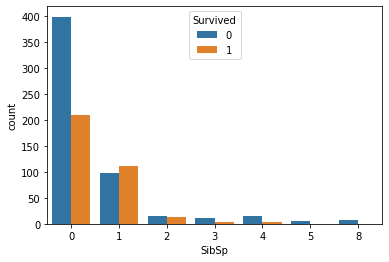

In [9]:
sns.countplot(x = "SibSp", hue = "Survived", data = df)

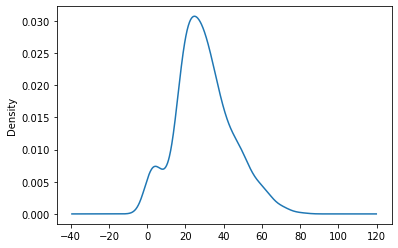

In [11]:
df.Age.plot(kind = "kde")

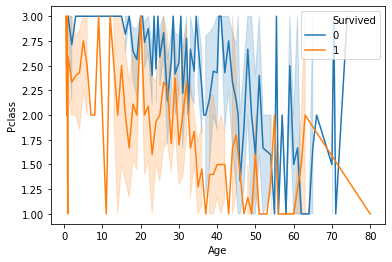

In [14]:
sns.lineplot(x = "Age", y = "Pclass", hue = "Survived", data = df) # seems that younger people had a higher chance of survival

In [15]:
# creating column of "young people" 
df["young"] = df.Age.apply(lambda x: 1 if x <= 20 else 0)

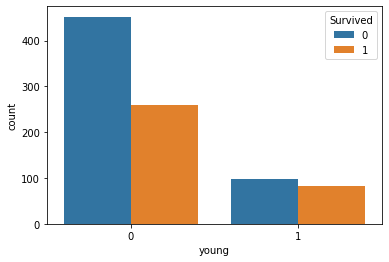

In [16]:
sns.countplot(x = "young", hue = "Survived", data = df)

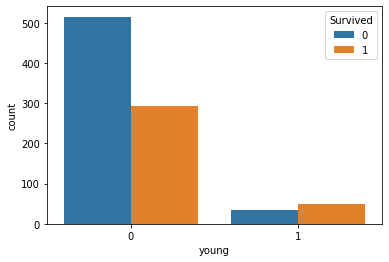

In [17]:
df["young"] = df.Age.apply(lambda x: 1 if x <= 15 else 0)
sns.countplot(x = "young", hue = "Survived", data = df)

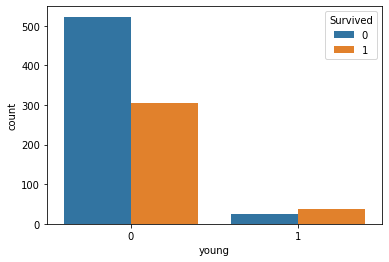

In [18]:
df["young"] = df.Age.apply(lambda x: 1 if x <= 10 else 0)
sns.countplot(x = "young", hue = "Survived", data = df)

In [19]:
df["young"] = df.Age.apply(lambda x: 1 if x <= 15 else 0) # This seemed a good age to split the sample into {1,0}

In [20]:
# creating single column
df["single"] = df.SibSp.apply(lambda x: 1 if x <= 1 else 0)

In [21]:
# creating the classifier object
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)

In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
young            int64
single           int64
dtype: object

In [28]:
# dummy numbers for sex
df["Sex_num"] = df.Sex.apply(lambda x: 1 if x == "female" else 0)

In [29]:
# feature matrix and target vector
feature_cols = ["Pclass", "Sex_num", "young", "single"]
X = df[feature_cols]
y = df['Survived']
print(X.shape, y.shape)

(891, 4) (891,)


In [30]:
# 10 fold cross_validated accuracy
score = cross_val_score(clf, X, y, cv = 10, scoring = "accuracy")
print(score.mean())

0.8003081375553286


In [31]:
# block for iteration
# feature matrix and target vector
feature_cols = ["Pclass", "Sex_num", "young"]
X = df[feature_cols]
y = df['Survived']
# 10 fold cross_validated accuracy
score = cross_val_score(clf, X, y, cv = 10, scoring = "accuracy")
print(score.mean())

0.7857002610373396


In [32]:
# block for iteration
# feature matrix and target vector
feature_cols = ["Pclass", "Sex_num"]
X = df[feature_cols]
y = df['Survived']
# 10 fold cross_validated accuracy
score = cross_val_score(clf, X, y, cv = 10, scoring = "accuracy")
print(score.mean())

0.7733398592668256


In [33]:
# block for iteration
# feature matrix and target vector
feature_cols = ["Sex_num"]
X = df[feature_cols]
y = df['Survived']
# 10 fold cross_validated accuracy
score = cross_val_score(clf, X, y, cv = 10, scoring = "accuracy")
print(score.mean())

0.7866981613891727


In [34]:
# block for iteration
# feature matrix and target vector
feature_cols = ["Pclass", "Sex_num", "young", "single"]
X = df[feature_cols]
y = df['Survived']
# 10 fold cross_validated accuracy
score = cross_val_score(clf, X, y, cv = 10, scoring = "accuracy")
print(score.mean())

0.8003081375553286


In [39]:
# check if prunig the decision tree increases generalization %
# looked up optimal parameters on internet
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 7, random_state = 0)
# feature matrix and target vector
feature_cols = ["Pclass", "Sex_num", "young", "single"]
X = df[feature_cols]
y = df['Survived']
# 10 fold cross_validated accuracy
score = cross_val_score(clf, X, y, cv = 10, scoring = "accuracy")
print(score.mean())

0.8003081375553286
